In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf  # Statistical Modeling
from sklearn import linear_model       # Machine Learning

In [ ]:
df1 = pd.read_csv('./../data/Auto.csv')

In [ ]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


# 1.	Examine your Data. Discuss at-least three insights from exploratory data analysis (other than univariate).

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

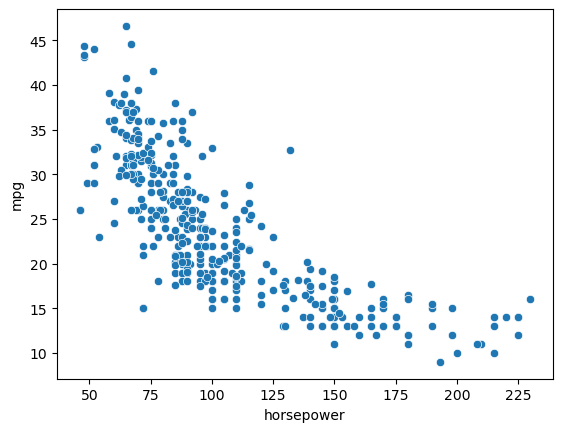

In [ ]:
sns.scatterplot(data = df1, x = 'horsepower', y ='mpg' )

### Obseravation: mpg and horsepower are negatively correlated. i.e with each increase in horse power there is a certain decrease in mpg

<AxesSubplot: xlabel='weight', ylabel='acceleration'>

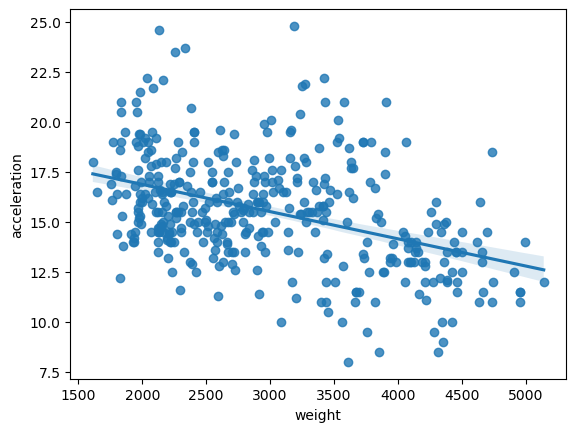

In [5]:
sns.regplot(data = df1, x = 'weight', y = 'acceleration')

### Obseravation: acceleration and weight are negatively correlated in most cases. it can be observed that in most cases acceleration factor decreased with increase in weight but there are a few exceptions

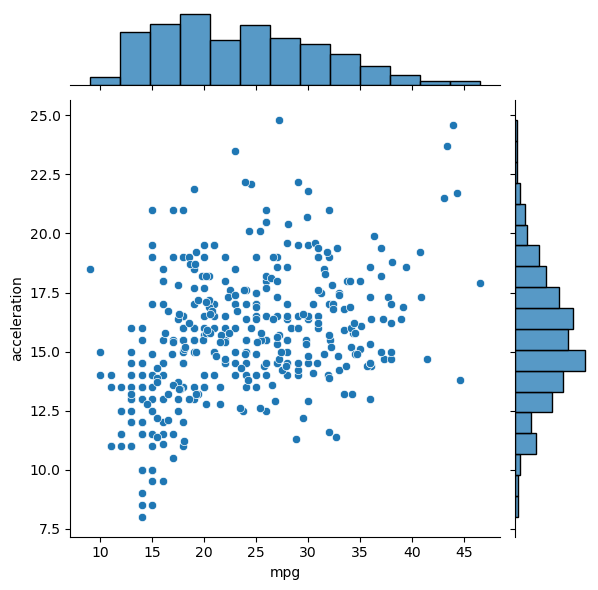

In [6]:
sns.jointplot(data = df1, y = 'acceleration', x = 'mpg' )

### Obseravation: Above joint plot illustrates that most cars have acceleration factor ranging between 12.5 to 15 and mpg ranging from 15 - 22. Also with every increase in mpg there is an increase in acceleration in most cases

# 2.	Is there any missing data? How to deal the missing values? 

In [7]:
#checking for nan values(missing data)

df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [9]:
nonull_data = df1.fillna(value = 0)

In [10]:
nonull_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


# 3. We are interested in predicting mpg (mile per gallon) based on horsepower

In [11]:
model = smf.ols('mpg~horsepower', data=df1).fit()

In [12]:
model.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

## a.	Identify outliers if any and show it in a scatterplot. 

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

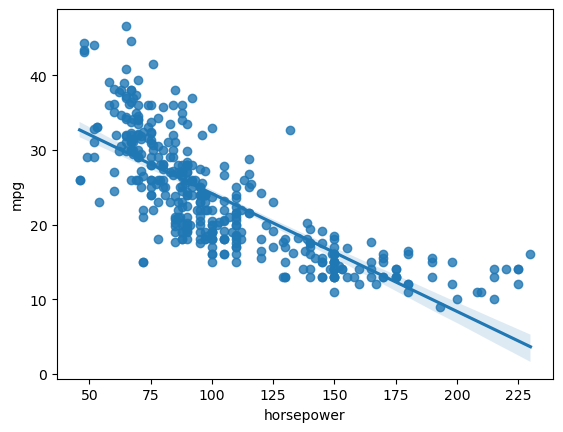

In [13]:
sns.regplot(data = df1, x = 'horsepower', y ='mpg' )

### Obseravation: mpg and horsepower are negatively correlated. i.e with each increase in 1 unit of horsepower there is a 0.15 unit decrease in mpg

## b.	Interpret the y-intercept. Does this make any sense? Why or why not?

In [14]:
model.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

### In the above model y intercept makes sense.
### Y intercept is 39.935 which denotes the highest value of mpg with 0 units of horsepower.

# 4. Perform a regression with Weight, origin and horespower as the independent variables. Interpret the model.  

In [15]:
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [16]:
model = smf.ols('weight~origin+horsepower', data=df1).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     498.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          9.50e-133
Time:                        17:06:08   Log-Likelihood:                -2889.8
No. Observations:                 392   AIC:                             5788.
Df Residuals:                     388   BIC:                             5803.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1403.3010     73.671     19.048      0.000    1258.456    1548.146
origin[T.European]  -302.3536     57.579     -5.251      0.000    -415.560    -189.147
origin[T.Japanese]  -502.6310     55.027     -9.134      0.000    -610.820    -394.442
horsepower            16.5410      0.583     28.374      0.000      15.395      17.687
==============================================================================
Omnibus:                       17.295   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.007
Skew:                          -0.019   Prob(JB):                     2.78e-10
Kurtosis:                       4.641   Cond. No.                         510.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept             1403.300971
origin[T.European]    -302.353648
origin[T.Japanese]    -502.630954
horsepower              16.540997
dtype: float64

### From the above modle we can deduce that weight is impacted by origin and horsepower of the vehicle as p value is lesser than 5% interval

# 5.	Split the data into train and test (70:30). Find the best model which gives lower mse at test data (you may have to do trial and error here).  Express the model as a mathematical equation relating the output variable to the input variables.

In [19]:
from sklearn.model_selection import train_test_split # will use this towards the end
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
nonull_data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320


In [21]:
nonull_data_dummy = pd.get_dummies(nonull_data, drop_first=True)

In [22]:
nonull_data_dummy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_European,origin_Japanese,name_amc ambassador dpl,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
nonull_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Columns: 312 entries, mpg to name_vw rabbit custom
dtypes: float64(4), int64(3), uint8(305)
memory usage: 140.1 KB


In [24]:
Y=nonull_data_dummy['horsepower']
X=nonull_data_dummy[['mpg','weight']]
#X=X.iloc[:,0:5]

In [25]:
X.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [26]:
#  Perform 70/30 Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3
                                                   )

In [27]:
X_test.head()

,mpg,weight
232,16.0,4335
34,16.0,3439
188,16.0,4190
160,17.0,3907
356,32.4,2350


In [28]:
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train, Y_train)

LinearRegression()

In [30]:
model.coef_

array([-0.81475771,  0.03237437])

In [31]:
Y_pred = model.predict(X_test)

In [32]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))



Coefficients: [-0.81475771  0.03237437]
Intercept: 26.10323342951085
Mean squared error (MSE): 450.91
Coefficient of determination (R^2): 0.73


In [33]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))


Coefficients: [-0.81475771  0.03237437]
Intercept: 26.10323342951085
Mean squared error (MSE): 450.91
Coefficient of determination (R^2): 0.73


### Observation: mathematical equation relflects as per given analysis is horsepower = ax1+bx2....nxn+111.69289646010711. horsepower is adjusted by various factors which are a part of presictive modelling part of horsepower based on multiple factors such as origin, weight, cylinders, name etc.,

Horsepower = -0.81475551(mpg)+0.03237437(weight)+26.10323342951085

# 6.	What are your conclusions and recommendations?

## With every increase in weight there is a decrease in mpg as well as horsepower since they are negatively correlated which can be observed from above analysis. paralelly we can also deduce that horsepower is negatively correlated to mpg as well. with ever increase in horsepower there is a decrease in mpg